In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
medicare_fraud1=pd.read_csv("TRAIN2.csv")
medicare_fraud1.shape

(5410, 158)

In [3]:
medicare_fraud1.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,...,2.0,24.0,5.0,2.0,24.0,2.0,16.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,...,39.0,132.0,45.0,39.0,132.0,39.0,78.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,1768,1782,64,88,50,...,0.0,143.0,27.0,0.0,143.0,0.0,103.0,24.0,5.0,0.0
3,PRV51005,1,280910,3700.0,0.0,13872,13910,426,680,507,...,0.0,1151.0,264.0,0.0,1171.0,0.0,654.0,262.0,10.0,0.0
4,PRV51007,0,33710,3264.0,19.0,852,852,26,40,22,...,1.0,72.0,12.0,1.0,72.0,1.0,38.0,14.0,0.0,0.0


In [4]:
list(medicare_fraud1.columns)

['Provider',
 'PotentialFraud',
 'InscClaimAmtReimbursed',
 'DeductibleAmtPaid',
 'AdmitForDays',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt',
 'Age',
 'WhetherDead',
 'PerProviderAvg_InscClaimAmtReimbursed',
 'PerProviderAvg_DeductibleAmtPaid',
 'PerProviderAvg_IPAnnualReimbursementAmt',
 'PerProviderAvg_IPAnnualDeductibleAmt',
 'PerProviderAvg_OPAnnualReimbursementAmt',
 'PerProviderAvg_OPAnnualDeductibleAmt',
 'PerProviderAvg_Age',
 'PerProviderAvg_NoOfMonths_PartACov',
 'PerProviderAvg_NoOfMonths_PartBCov',
 'PerProviderAvg_AdmitForDays',
 'PerBeneIDAvg_InscClaimAmtRe

In [5]:
medicare_fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Columns: 158 entries, Provider to Race_5
dtypes: float64(132), int64(25), object(1)
memory usage: 6.5+ MB


In [5]:
y=medicare_fraud1.PotentialFraud.values
y

array([0, 1, 0, ..., 0, 0, 0])

In [6]:
medicare_fraud1.drop(["Provider","PotentialFraud"],axis=1,inplace=True)

In [7]:
x=medicare_fraud1.values
x

array([[1.0464e+05, 5.3400e+03, 3.0000e+01, ..., 4.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.0567e+05, 6.6286e+04, 3.8200e+02, ..., 2.4000e+01, 0.0000e+00,
        1.0000e+00],
       [5.2170e+04, 3.1000e+02, 0.0000e+00, ..., 2.4000e+01, 5.0000e+00,
        0.0000e+00],
       ...,
       [1.8470e+04, 3.7000e+02, 0.0000e+00, ..., 7.0000e+00, 1.0000e+00,
        4.0000e+00],
       [1.9000e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.3610e+04, 3.9000e+02, 0.0000e+00, ..., 1.6000e+01, 4.0000e+00,
        0.0000e+00]])

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()

In [9]:
x=scaler.fit_transform(x)
x

array([[ 0.00657567, -0.10988379, -0.12425395, ..., -0.21888877,
        -0.17022483, -0.19598378],
       [ 1.87113809,  2.3355533 ,  2.07755202, ...,  0.47769256,
        -0.17022483, -0.10628223],
       [-0.18868926, -0.31171079, -0.31190787, ...,  0.47769256,
         0.06333245, -0.19598378],
       ...,
       [-0.31410242, -0.30930331, -0.31190787, ..., -0.11440157,
        -0.12351338,  0.16282239],
       [-0.37576699, -0.32414943, -0.31190787, ..., -0.35820504,
        -0.17022483, -0.19598378],
       [-0.22054495, -0.30850082, -0.31190787, ...,  0.19906003,
         0.01662099, -0.19598378]])

In [10]:
from sklearn.model_selection import train_test_split

## 'stratify=y' will make sure equal distribution of yes:no in both train and validation

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)

In [11]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (3787, 156)
y_train : (3787,)
X_test : (1623, 156)
y_test : (1623,)


# BUILDING LOGISTIC REGRESSION MACHINE LEARNING MODEL

In [23]:
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,class_weight='balanced',random_state=123)    

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies
#in the input data as ``n_samples / (n_classes * np.bincount(y))``.

log.fit(X_train,y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=123)

In [13]:
print(log.score(X_train,y_train))
print(log.score(X_test,y_test))

0.9139160285186163
0.9032655576093653


In [15]:
"""
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=12,random_state=0)

score=cross_val_score(model,x,y,cv=kfold,scoring="accuracy")

score.mean()
"""

'\nfrom sklearn.model_selection import cross_val_score,KFold\n\nkfold=KFold(n_splits=12,random_state=0)\n\nscore=cross_val_score(model,x,y,cv=kfold,scoring="accuracy")\n\nscore.mean()\n'

In [26]:
y_predict=log.predict(X_test)
a = list(y_predict)
print(a.count(1))
print(a.count(0))

231
1392


In [25]:
y_test#actual
b = list(y_test)
print(b.count(1))
print(b.count(0))

152
1471


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

cm_df = pd.DataFrame(confusion_matrix(y_test, y_predict).T, index=log.classes_,columns=log.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True          0    1
Predicted           
0          1353   39
1           118  113


In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1471
           1       0.49      0.74      0.59       152

    accuracy                           0.90      1623
   macro avg       0.73      0.83      0.77      1623
weighted avg       0.93      0.90      0.91      1623



ROC AUC: 0.83


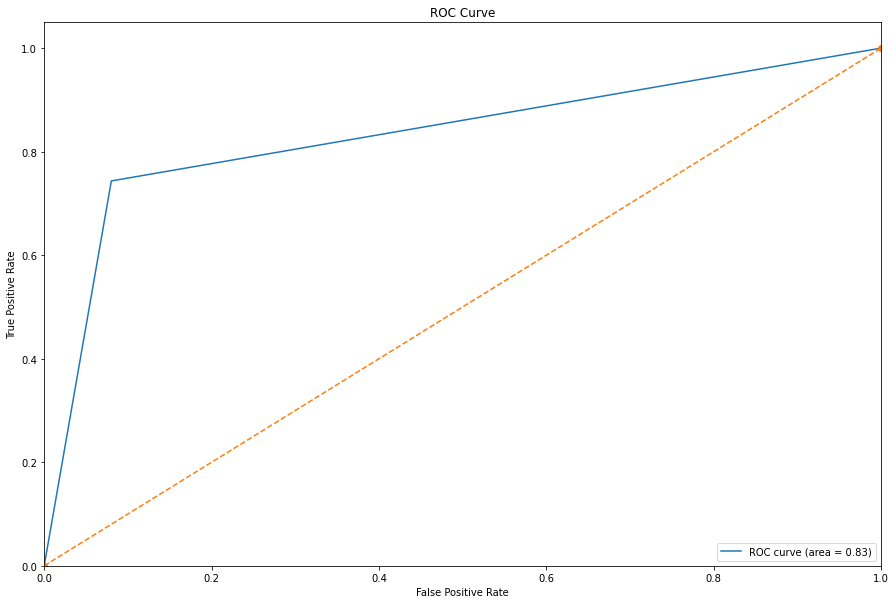

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_predict)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# BUILDING MACHINE LEARNING MODEL USING SUPPORT VECTOR MACHINE CLASSIFIER

In [29]:
from sklearn.svm import SVC
svc=SVC()

In [30]:
svc.fit(X_train,y_train)

SVC()

In [31]:
svc.score(X_train,y_train)

0.9387377871666227

In [32]:
svc.score(X_test,y_test)

0.9359211337030191

In [25]:
"""
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=12,random_state=0)

score=cross_val_score(model,x,y,cv=kfold,scoring="accuracy")

score.mean()
"""

'\nfrom sklearn.model_selection import cross_val_score,KFold\n\nkfold=KFold(n_splits=12,random_state=0)\n\nscore=cross_val_score(model,x,y,cv=kfold,scoring="accuracy")\n\nscore.mean()\n'

In [33]:
y_pred=svc.predict(X_test)
a1 = list(y_pred)
print(a1.count(1))
print(a1.count(0))

72
1551


In [34]:
y_test
b1 = list(y_test)
print(b1.count(1))
print(b1.count(0))

152
1471


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=svc.classes_,columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True          0   1
Predicted          
0          1459  92
1            12  60


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1471
           1       0.83      0.39      0.54       152

    accuracy                           0.94      1623
   macro avg       0.89      0.69      0.75      1623
weighted avg       0.93      0.94      0.93      1623



ROC AUC: 0.69


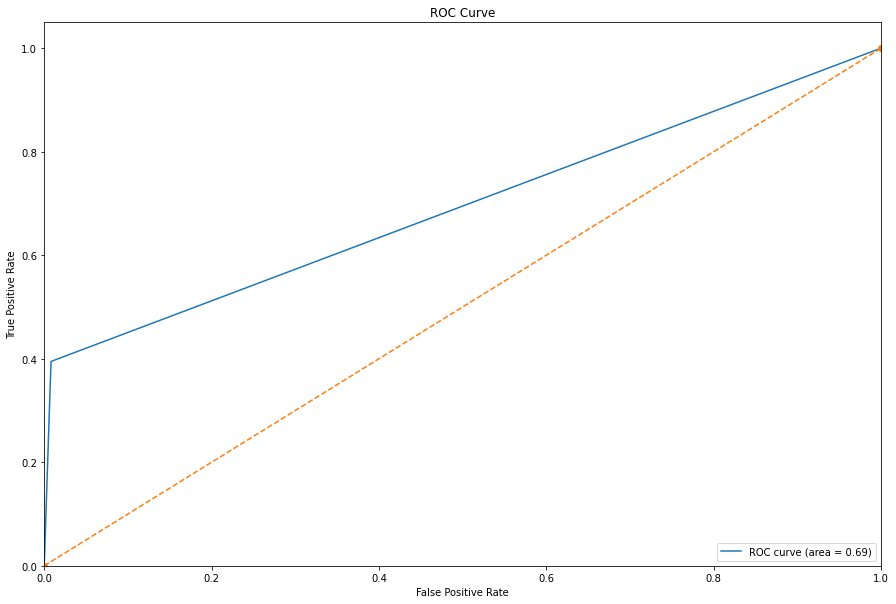

In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# WORKING ON TEST DATA

In [31]:
test_fraud=pd.read_csv("TEST.csv")

In [32]:
test_fraud.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1,ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_OperatingPhysician,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,Gender_2,Race_2,Race_3,Race_5
0,PRV51002,53790,380.0,0.0,2424,2460,79,108,72,25,...,0.0,202.0,30.0,0.0,204.0,0.0,134.0,30.0,2.0,4.0
1,PRV51006,30720,0.0,0.0,1224,1224,35,69,50,15,...,0.0,99.0,26.0,0.0,99.0,0.0,59.0,26.0,0.0,0.0
2,PRV51009,27230,1238.0,8.0,468,468,8,17,19,1,...,2.0,40.0,24.0,2.0,41.0,2.0,23.0,6.0,0.0,0.0
3,PRV51010,64580,5340.0,29.0,444,444,21,23,19,7,...,3.0,38.0,9.0,3.0,38.0,3.0,15.0,1.0,0.0,0.0
4,PRV51018,61620,670.0,0.0,2232,2276,73,109,93,25,...,0.0,188.0,30.0,0.0,188.0,0.0,124.0,45.0,0.0,0.0


In [33]:
Provider=test_fraud.Provider

In [34]:
test_fraud.drop(["Provider"],axis=1,inplace=True)

In [35]:
list((medicare_fraud1.columns==test_fraud.columns))

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [36]:

(medicare_fraud1.columns==test_fraud.columns)



array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [37]:
np.unique((medicare_fraud1.columns==test_fraud.columns))



array([ True])

In [38]:
pd.value_counts(list((medicare_fraud1.columns==test_fraud.columns)))

True    156
dtype: int64

# TEST DATA PREDICTION OF FRAUD USING SUPPORT VECTOR ML MODEL BUILD ON TRAIN DATA

In [39]:
submission_predict=svc.predict(test_fraud)

In [40]:
submission=pd.DataFrame(data = {'Provider':Provider,'PotentialFraud':submission_predict})
submission["PotentialFraud"]=submission["PotentialFraud"].map({0: "N", 1: "Y"})

In [41]:
submission.to_csv('Sample_Submission.csv',index = False)

In [42]:
medicare_fraud_submission=pd.read_csv("Sample_Submission.csv")
medicare_fraud_submission.head()

,Provider,PotentialFraud
0,PRV51002,Y
1,PRV51006,Y
2,PRV51009,Y
3,PRV51010,Y
4,PRV51018,Y
